# Visualization of sea ice extent

In [1]:
#pip install celluloid

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import Video
from celluloid import Camera
from matplotlib.dates import DateFormatter

#General
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="darkgrid")

In [3]:
#read the data
df_viz = pd.read_csv('../data/N_dailydata.csv')
df_viz.drop('Unnamed: 0', axis=1, inplace=True)
df_viz['date'] = pd.to_datetime(df_viz['date'])

# Extract additional features from timestamp column
df_viz = df_viz.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    day = lambda x: x['date'].dt.day,
    dayofyear = lambda x: x['date'].dt.dayofyear
    )

In [4]:
df_viz.head()

,date,extent,year,month,day,dayofyear
0,1978-10-26,10231000.0,1978,10,26,299
1,1978-10-27,10231000.0,1978,10,27,300
2,1978-10-28,10420000.0,1978,10,28,301
3,1978-10-29,10420000.0,1978,10,29,302
4,1978-10-30,10557000.0,1978,10,30,303


In [5]:
df_viz.query('year == 1978')

,date,extent,year,month,day,dayofyear
0,1978-10-26,10231000.0,1978,10,26,299
1,1978-10-27,10231000.0,1978,10,27,300
2,1978-10-28,10420000.0,1978,10,28,301
3,1978-10-29,10420000.0,1978,10,29,302
4,1978-10-30,10557000.0,1978,10,30,303
...,...,...,...,...,...,...
62,1978-12-27,14383000.0,1978,12,27,361
63,1978-12-28,14383000.0,1978,12,28,362
64,1978-12-29,14500000.0,1978,12,29,363
65,1978-12-30,14500000.0,1978,12,30,364


In [6]:
df_viz.drop(labels=range(0,67),axis=0, inplace=True)
df_viz.head()

,date,extent,year,month,day,dayofyear
67,1979-01-01,14585000.0,1979,1,1,1
68,1979-01-02,14997000.0,1979,1,2,2
69,1979-01-03,14997000.0,1979,1,3,3
70,1979-01-04,14922000.0,1979,1,4,4
71,1979-01-05,14922000.0,1979,1,5,5


In [7]:
df_viz['year']= df_viz['year'].apply(str)

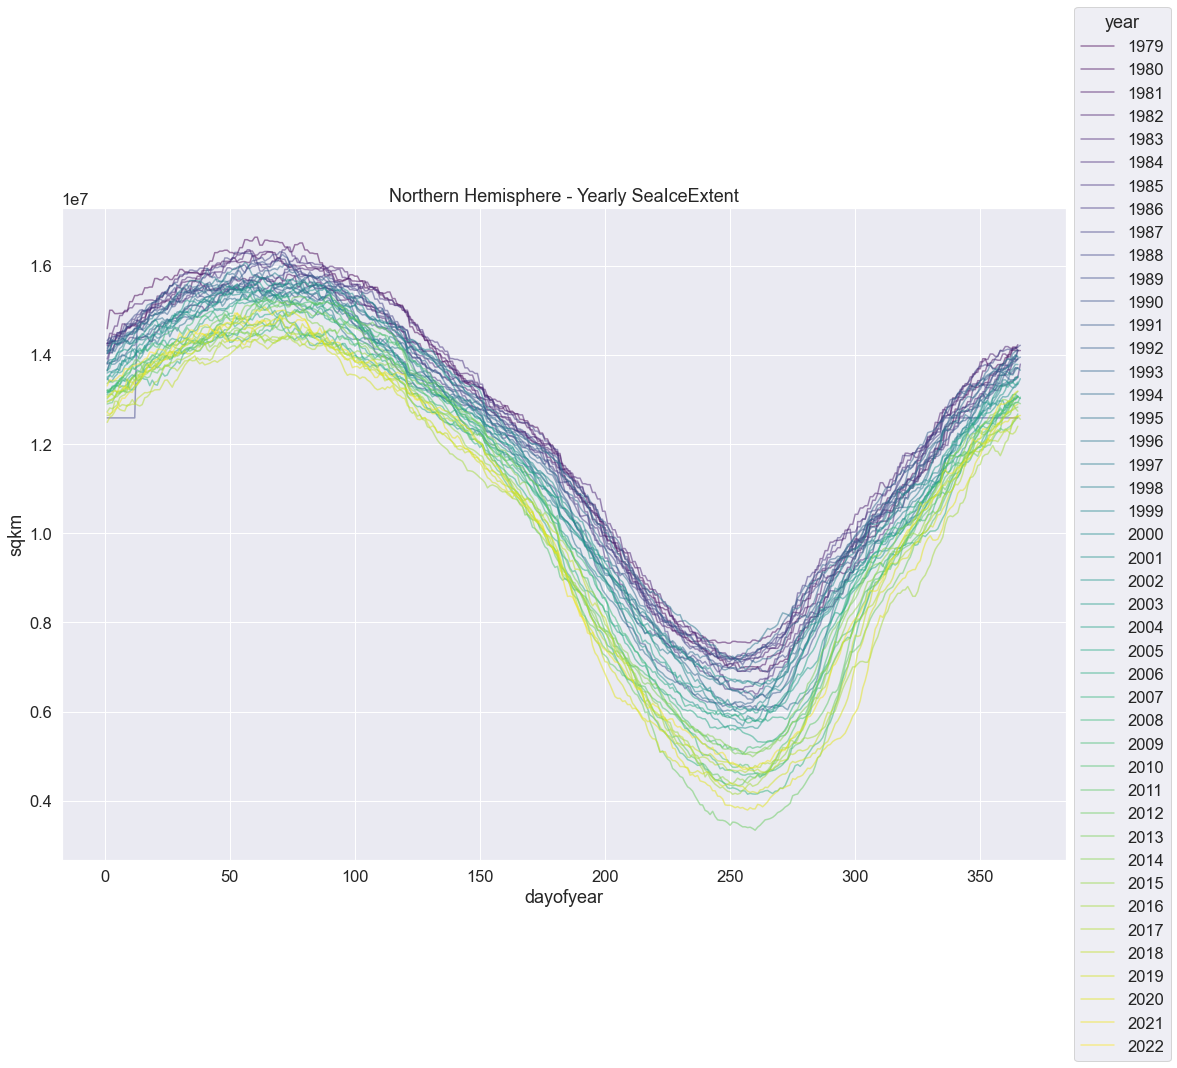

In [8]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(18,12)) 

pd.pivot_table(data=df_viz[['year', 'dayofyear', 'extent']], index='dayofyear', columns='year') \
    ['extent'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent', ylabel=r'sqkm');

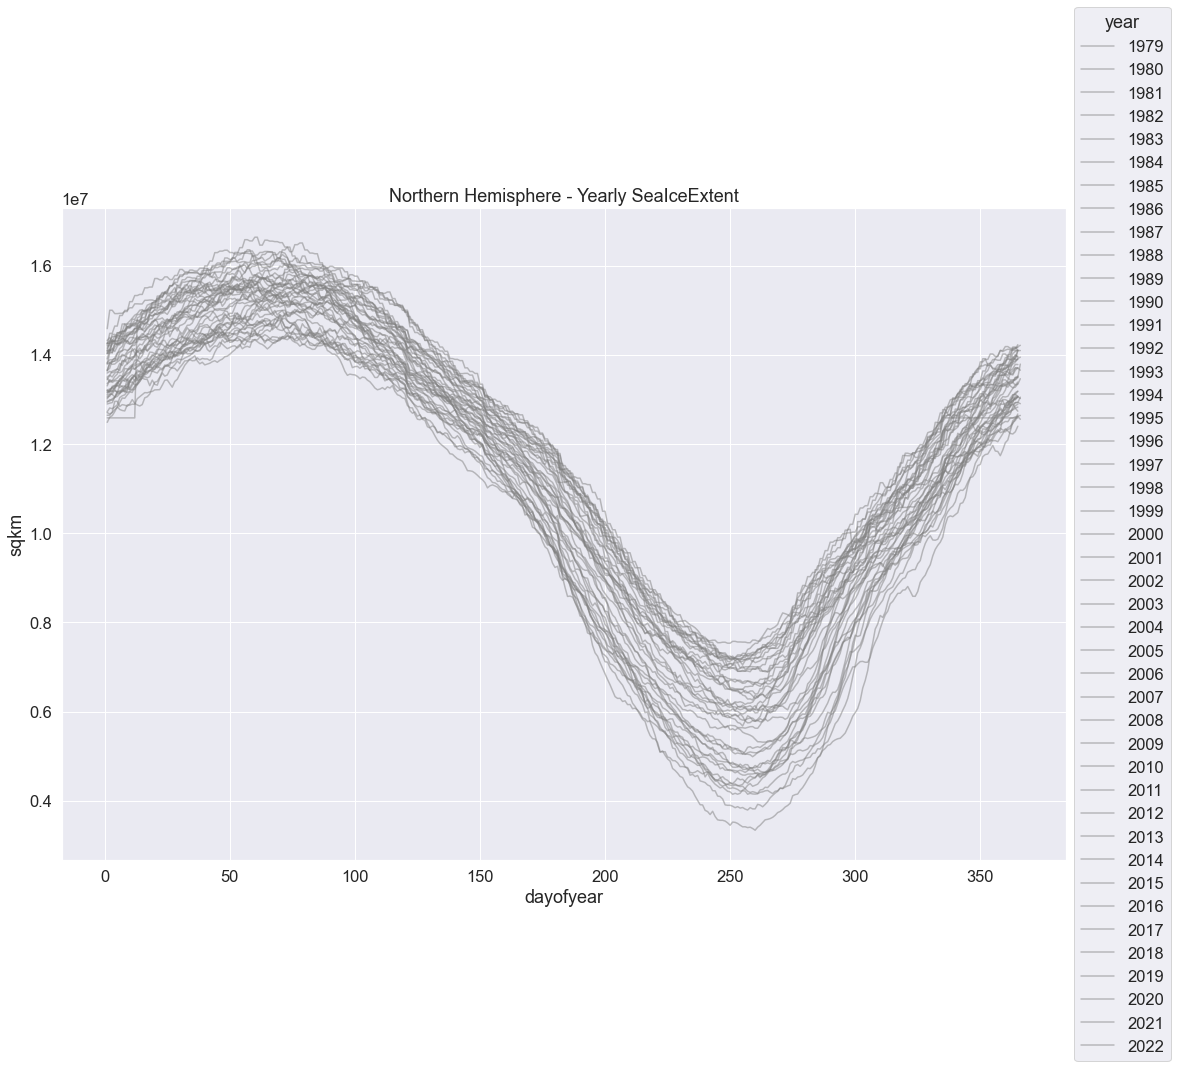

In [9]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(18,12)) 

pd.pivot_table(data=df_viz[['year', 'dayofyear', 'extent']], index='dayofyear', columns='year') \
    ['extent'] \
    .plot(color='grey', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent', ylabel=r'sqkm');

In [10]:
df_years = pd.pivot_table(data=df_viz[['year', 'month', 'day', 'extent']], index=['month','day'], columns='year')
df_years.head()

extent                                                  \
year             1979        1980        1981        1982        1983   
month day                                                               
1     1    14585000.0  14200000.0  14256000.0  14224000.0  14253000.0   
      2    14997000.0  14200000.0  14256000.0  14479000.0  14253000.0   
      3    14997000.0  14302000.0  14456000.0  14479000.0  14306000.0   
      4    14922000.0  14302000.0  14456000.0  14642000.0  14306000.0   
      5    14922000.0  14414000.0  14435000.0  14642000.0  14494000.0   

                                                                       ...  \
year             1984        1985        1986        1987        1988  ...   
month day                                                              ...   
1     1    13907000.0  13789000.0  14036000.0  14089000.0  12584000.0  ...   
      2    14103000.0  14045000.0  14036000.0  14305000.0  12584000.0  ...   
      3    14103000.0  14045000.0  14292000.0  14305000.0  12584000.0  ...   
      4    14237000.0  14240000.0  14292000.0  14417000.0  12584000.0  ...   
      5    14237000.0  14240000.0  14489000.0  14417000.0  12584000.0  ...   

                                                                       \
year             2013        2014        2015        2016        2017   
month day                                                               
1     1    12959000.0  13011000.0  13073000.0  12721000.0  12643000.0   
      2    12961000.0  13103000.0  13125000.0  12806000.0  12644000.0   
      3    13012000.0  13116000.0  13112000.0  12790000.0  12713000.0   
      4    13045000.0  13219000.0  13051000.0  12829000.0  12954000.0   
      5    13065000.0  13148000.0  13115000.0  12874000.0  12956000.0   

                                                                       
year             2018        2019        2020        2021        2022  
month day                                                              
1     1    12484000.0  12934000.0  13046000.0  12702000.0  13302000.0  
      2    12600000.0  12992000.0  13072000.0  12671000.0  13438000.0  
      3    12634000.0  12980000.0  13170000.0  12704000.0  13411000.0  
      4    12724000.0  13045000.0  13193000.0  12770000.0  13436000.0  
      5    12834000.0  13147000.0  13166000.0  12814000.0  13477000.0  

[5 rows x 44 columns]

In [11]:
df_years.tail()

extent                                                  \
year             1979        1980        1981        1982        1983   
month day                                                               
12    27   13934000.0  14000000.0  13953000.0  14183000.0  13664000.0   
      28   14101000.0  14172000.0  13953000.0  14144000.0  13664000.0   
      29   14101000.0  14172000.0  14128000.0  14144000.0  13855000.0   
      30   14092000.0  14093000.0  14128000.0  14159000.0  13855000.0   
      31   14092000.0  14093000.0  14224000.0  14159000.0  13907000.0   

                                                                       ...  \
year             1984        1985        1986        1987        1988  ...   
month day                                                              ...   
12    27   13394000.0  13756000.0  13766000.0  12584000.0  14116000.0  ...   
      28   13394000.0  13571000.0  13766000.0  12584000.0  14115000.0  ...   
      29   13494000.0  13571000.0  13904000.0  12584000.0  14141000.0  ...   
      30   13494000.0  13701000.0  13904000.0  12584000.0  14180000.0  ...   
      31   13789000.0  13701000.0  14089000.0  12584000.0  14211000.0  ...   

                                                                       \
year             2013        2014        2015        2016        2017   
month day                                                               
12    27   12693000.0  12967000.0  12680000.0  12291000.0  12291000.0   
      28   12870000.0  12930000.0  12745000.0  12484000.0  12235000.0   
      29   12897000.0  12936000.0  12762000.0  12525000.0  12223000.0   
      30   12804000.0  13038000.0  12800000.0  12617000.0  12273000.0   
      31   12826000.0  13046000.0  12735000.0  12553000.0  12397000.0   

                                                                
year             2018        2019        2020        2021 2022  
month day                                                       
12    27   12325000.0  12721000.0  12579000.0  12947000.0  NaN  
      28   12344000.0  12712000.0  12582000.0  12978000.0  NaN  
      29   12523000.0  12780000.0  12608000.0  13050000.0  NaN  
      30   12569000.0  12858000.0  12622000.0  13149000.0  NaN  
      31   12621000.0  12889000.0  12639000.0  13183000.0  NaN  

[5 rows x 44 columns]

In [12]:
df_years = df_years.reset_index()
df_years.head()

month day      extent                                                  \
year                  1979        1980        1981        1982        1983   
0        1   1  14585000.0  14200000.0  14256000.0  14224000.0  14253000.0   
1        1   2  14997000.0  14200000.0  14256000.0  14479000.0  14253000.0   
2        1   3  14997000.0  14302000.0  14456000.0  14479000.0  14306000.0   
3        1   4  14922000.0  14302000.0  14456000.0  14642000.0  14306000.0   
4        1   5  14922000.0  14414000.0  14435000.0  14642000.0  14494000.0   

                                          ...                          \
year        1984        1985        1986  ...        2013        2014   
0     13907000.0  13789000.0  14036000.0  ...  12959000.0  13011000.0   
1     14103000.0  14045000.0  14036000.0  ...  12961000.0  13103000.0   
2     14103000.0  14045000.0  14292000.0  ...  13012000.0  13116000.0   
3     14237000.0  14240000.0  14292000.0  ...  13045000.0  13219000.0   
4     14237000.0  14240000.0  14489000.0  ...  13065000.0  13148000.0   

                                                                              \
year        2015        2016        2017        2018        2019        2020   
0     13073000.0  12721000.0  12643000.0  12484000.0  12934000.0  13046000.0   
1     13125000.0  12806000.0  12644000.0  12600000.0  12992000.0  13072000.0   
2     13112000.0  12790000.0  12713000.0  12634000.0  12980000.0  13170000.0   
3     13051000.0  12829000.0  12954000.0  12724000.0  13045000.0  13193000.0   
4     13115000.0  12874000.0  12956000.0  12834000.0  13147000.0  13166000.0   

                              
year        2021        2022  
0     12702000.0  13302000.0  
1     12671000.0  13438000.0  
2     12704000.0  13411000.0  
3     12770000.0  13436000.0  
4     12814000.0  13477000.0  

[5 rows x 46 columns]

In [13]:
df_years.columns = ["_".join(a) for a in df_years.columns.to_flat_index()]

In [14]:
df_years.drop('extent_2022', axis=1, inplace=True)

In [15]:
#delete Feb 29th 
df_years.dropna(axis=0, inplace=True)
df_years.tail()

,month_,day_,extent_1979,extent_1980,extent_1981,extent_1982,extent_1983,extent_1984,extent_1985,extent_1986,...,extent_2012,extent_2013,extent_2014,extent_2015,extent_2016,extent_2017,extent_2018,extent_2019,extent_2020,extent_2021
361,12,27,13934000.0,14000000.0,13953000.0,14183000.0,13664000.0,13394000.0,13756000.0,13766000.0,...,12669000.0,12693000.0,12967000.0,12680000.0,12291000.0,12291000.0,12325000.0,12721000.0,12579000.0,12947000.0
362,12,28,14101000.0,14172000.0,13953000.0,14144000.0,13664000.0,13394000.0,13571000.0,13766000.0,...,12834000.0,12870000.0,12930000.0,12745000.0,12484000.0,12235000.0,12344000.0,12712000.0,12582000.0,12978000.0
363,12,29,14101000.0,14172000.0,14128000.0,14144000.0,13855000.0,13494000.0,13571000.0,13904000.0,...,12926000.0,12897000.0,12936000.0,12762000.0,12525000.0,12223000.0,12523000.0,12780000.0,12608000.0,13050000.0
364,12,30,14092000.0,14093000.0,14128000.0,14159000.0,13855000.0,13494000.0,13701000.0,13904000.0,...,12931000.0,12804000.0,13038000.0,12800000.0,12617000.0,12273000.0,12569000.0,12858000.0,12622000.0,13149000.0
365,12,31,14092000.0,14093000.0,14224000.0,14159000.0,13907000.0,13789000.0,13701000.0,14089000.0,...,12902000.0,12826000.0,13046000.0,12735000.0,12553000.0,12397000.0,12621000.0,12889000.0,12639000.0,13183000.0


In [16]:
df_years.to_csv('../data/years.csv',  encoding='utf-8', index=False)

#### preparing actual data

In [17]:
df = pd.read_csv('../data/years.csv')
df['year'] = 1900
df.rename(columns={'month_':'month', 'day_':'day'}, inplace=True)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop(['month', 'day'], axis=1, inplace=True)
df.head()

,extent_1979,extent_1980,extent_1981,extent_1982,extent_1983,extent_1984,extent_1985,extent_1986,extent_1987,extent_1988,...,extent_2014,extent_2015,extent_2016,extent_2017,extent_2018,extent_2019,extent_2020,extent_2021,year,date
0,14585000.0,14200000.0,14256000.0,14224000.0,14253000.0,13907000.0,13789000.0,14036000.0,14089000.0,12584000.0,...,13011000.0,13073000.0,12721000.0,12643000.0,12484000.0,12934000.0,13046000.0,12702000.0,1900,1900-01-01
1,14997000.0,14200000.0,14256000.0,14479000.0,14253000.0,14103000.0,14045000.0,14036000.0,14305000.0,12584000.0,...,13103000.0,13125000.0,12806000.0,12644000.0,12600000.0,12992000.0,13072000.0,12671000.0,1900,1900-01-02
2,14997000.0,14302000.0,14456000.0,14479000.0,14306000.0,14103000.0,14045000.0,14292000.0,14305000.0,12584000.0,...,13116000.0,13112000.0,12790000.0,12713000.0,12634000.0,12980000.0,13170000.0,12704000.0,1900,1900-01-03
3,14922000.0,14302000.0,14456000.0,14642000.0,14306000.0,14237000.0,14240000.0,14292000.0,14417000.0,12584000.0,...,13219000.0,13051000.0,12829000.0,12954000.0,12724000.0,13045000.0,13193000.0,12770000.0,1900,1900-01-04
4,14922000.0,14414000.0,14435000.0,14642000.0,14494000.0,14237000.0,14240000.0,14489000.0,14417000.0,12584000.0,...,13148000.0,13115000.0,12874000.0,12956000.0,12834000.0,13147000.0,13166000.0,12814000.0,1900,1900-01-05


In [18]:
df.columns

Index(['extent_1979', 'extent_1980', 'extent_1981', 'extent_1982',
       'extent_1983', 'extent_1984', 'extent_1985', 'extent_1986',
       'extent_1987', 'extent_1988', 'extent_1989', 'extent_1990',
       'extent_1991', 'extent_1992', 'extent_1993', 'extent_1994',
       'extent_1995', 'extent_1996', 'extent_1997', 'extent_1998',
       'extent_1999', 'extent_2000', 'extent_2001', 'extent_2002',
       'extent_2003', 'extent_2004', 'extent_2005', 'extent_2006',
       'extent_2007', 'extent_2008', 'extent_2009', 'extent_2010',
       'extent_2011', 'extent_2012', 'extent_2013', 'extent_2014',
       'extent_2015', 'extent_2016', 'extent_2017', 'extent_2018',
       'extent_2019', 'extent_2020', 'extent_2021', 'year', 'date'],
      dtype='object')

In [19]:
df[['extent_1979', 'extent_1980', 'extent_1981', 'extent_1982',
       'extent_1983', 'extent_1984', 'extent_1985', 'extent_1986',
       'extent_1987', 'extent_1988', 'extent_1989', 'extent_1990',
       'extent_1991', 'extent_1992', 'extent_1993', 'extent_1994',
       'extent_1995', 'extent_1996', 'extent_1997', 'extent_1998',
       'extent_1999', 'extent_2000', 'extent_2001', 'extent_2002',
       'extent_2003', 'extent_2004', 'extent_2005', 'extent_2006',
       'extent_2007', 'extent_2008', 'extent_2009', 'extent_2010',
       'extent_2011', 'extent_2012', 'extent_2013', 'extent_2014',
       'extent_2015', 'extent_2016', 'extent_2017', 'extent_2018',
       'extent_2019', 'extent_2020', 'extent_2021']] /= 1000000

df.describe()

,extent_1979,extent_1980,extent_1981,extent_1982,extent_1983,extent_1984,extent_1985,extent_1986,extent_1987,extent_1988,...,extent_2013,extent_2014,extent_2015,extent_2016,extent_2017,extent_2018,extent_2019,extent_2020,extent_2021,year
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,12.325767,12.323501,12.129764,12.444334,12.331592,11.902912,11.991537,12.203071,12.184312,12.098299,...,10.897115,10.790496,10.565816,10.151485,10.392701,10.355041,10.200984,10.136622,10.546904,1900.0
std,3.182270,2.963644,2.973228,2.994520,2.905658,2.982594,3.180666,2.880284,3.003346,2.933338,...,3.384950,3.306443,3.385585,3.466680,3.338675,3.327586,3.623627,3.798500,3.409724,0.0
min,6.895000,7.533000,6.902000,7.160000,7.204000,6.396000,6.486000,7.122000,6.890000,7.048000,...,5.040000,4.988000,4.387000,4.145000,4.635000,4.630000,4.166000,3.793000,4.703000,1900.0
25%,9.614000,9.586000,9.233000,9.847000,9.878000,9.266000,8.959000,9.759000,9.478000,9.445000,...,7.825000,7.778000,7.671000,7.061000,7.341000,7.209000,6.591000,6.156000,7.258000,1900.0
50%,12.832000,12.706000,12.816000,12.874000,12.769000,12.526000,12.674000,12.591000,12.584000,12.584000,...,11.768000,11.724000,11.323000,10.864000,11.294000,11.203000,11.089000,10.964000,11.428000,1900.0
75%,15.500000,15.141000,14.983000,15.276000,15.014000,14.678000,15.109000,14.991000,15.022000,15.022000,...,14.015000,13.802000,13.856000,13.591000,13.469000,13.399000,13.458000,13.575000,13.721000,1900.0
max,16.635000,16.302000,15.801000,16.325000,16.412000,15.809000,16.163000,16.158000,16.293000,16.309000,...,15.196000,15.007000,14.554000,14.566000,14.449000,14.499000,14.896000,15.071000,14.866000,1900.0


#### preparing predicted data

In [20]:
df_pred = pd.read_csv('../data/NH_forecast.csv')
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           16583 non-null  object 
 1   Future_Extent  16583 non-null  float64
dtypes: float64(1), object(1)
memory usage: 259.2+ KB


In [21]:
df_pred['date']= pd.to_datetime(df_pred['date'])

# Extract additional features from timestamp column
df_pred = df_pred.assign(
    year = lambda x: x['date'].dt.year,
    month = lambda x: x['date'].dt.month,
    dayofyear = lambda x: x['date'].dt.dayofyear
    )

df_pred['Future_Extent']*=1000000

In [22]:
df_pred.query('year == 2021')

,date,Future_Extent,year,month,dayofyear
13757,2021-01-01,1.237712e+07,2021,1,1
13758,2021-01-02,1.242041e+07,2021,1,2
13759,2021-01-03,1.246383e+07,2021,1,3
13760,2021-01-04,1.249694e+07,2021,1,4
13761,2021-01-05,1.255382e+07,2021,1,5
...,...,...,...,...,...
14115,2021-12-27,1.202514e+07,2021,12,361
14116,2021-12-28,1.208917e+07,2021,12,362
14117,2021-12-29,1.213771e+07,2021,12,363
14118,2021-12-30,1.219825e+07,2021,12,364


In [23]:
df_pred.drop(labels=range(0,14120),axis=0, inplace=True)
df_pred.tail()

,date,Future_Extent,year,month,dayofyear
16578,2221-11-01,-4.231330e+06,2221,11,305
16579,2221-12-01,-2.069899e+06,2221,12,335
16580,2222-01-01,-8.051229e+04,2222,1,1
16581,2222-02-01,1.170107e+06,2222,2,32
16582,2222-03-01,1.711289e+06,2222,3,60


In [24]:
df_pred.query('year == 2100')

,date,Future_Extent,year,month,dayofyear
15116,2100-01-01,7.492336e+06,2100,1,1
15117,2100-02-01,8.677427e+06,2100,2,32
15118,2100-03-01,9.188641e+06,2100,3,60
15119,2100-04-01,8.973630e+06,2100,4,91
15120,2100-05-01,7.795721e+06,2100,5,121
15121,2100-06-01,6.298825e+06,2100,6,152
15122,2100-07-01,4.380749e+06,2100,7,182
15123,2100-08-01,1.654455e+06,2100,8,213
15124,2100-09-01,-1.585302e+05,2100,9,244
15125,2100-10-01,3.610389e+05,2100,10,274


In [25]:
df_pred.drop(labels=range(15116,16583),axis=0, inplace=True)

In [26]:
df_pred.tail()

,date,Future_Extent,year,month,dayofyear
15111,2099-08-01,1.700012e+06,2099,8,213
15112,2099-09-01,-1.015272e+05,2099,9,244
15113,2099-10-01,4.359303e+05,2099,10,274
15114,2099-11-01,3.374727e+06,2099,11,305
15115,2099-12-01,5.546108e+06,2099,12,335


In [27]:
df_pred['year']= df_pred['year'].apply(str)

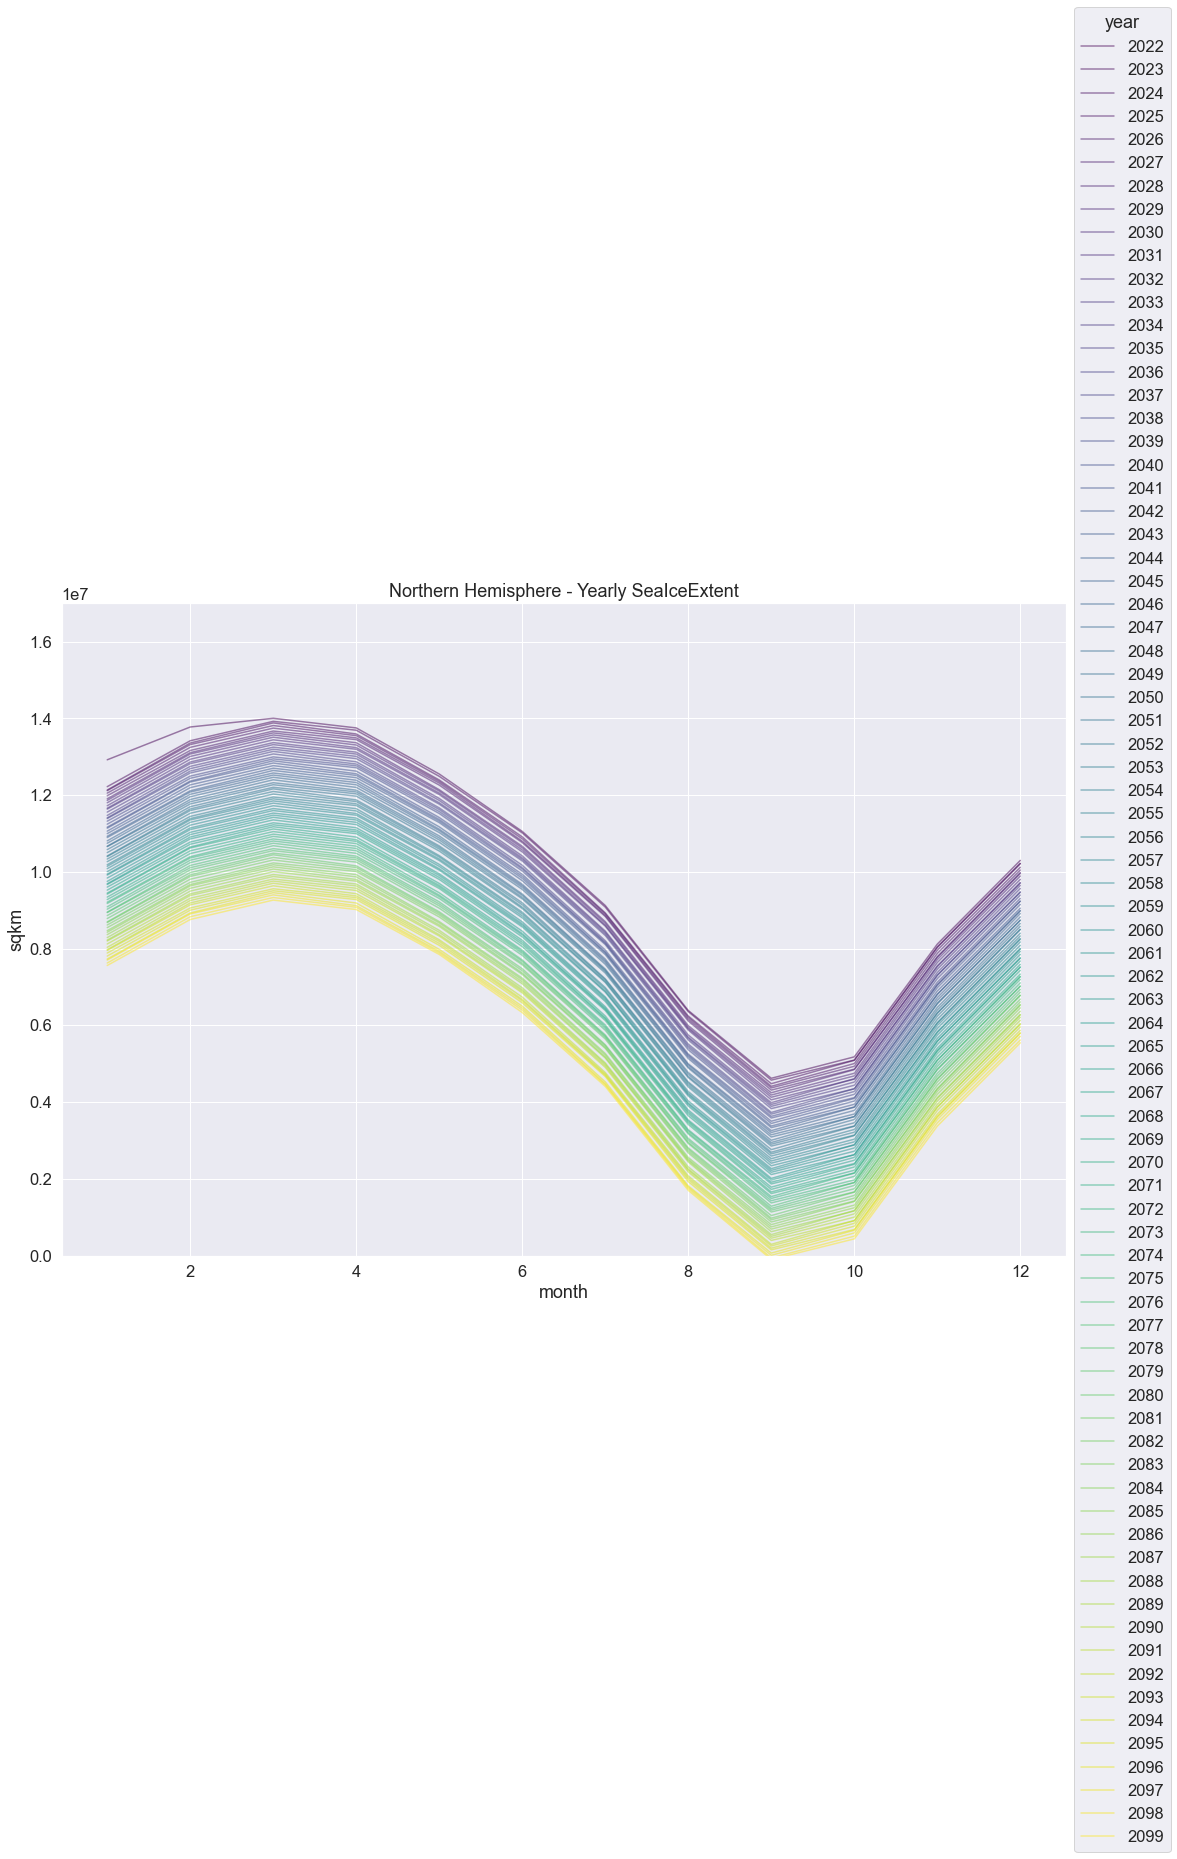

In [28]:
# Plot yearly seasonality
fig, ax = plt.subplots(figsize=(18,12)) 

pd.pivot_table(data=df_pred[['year', 'month', 'Future_Extent']], index='month', columns='year') \
    ['Future_Extent'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.set_ylim(0,17000000)
ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Northern Hemisphere - Yearly SeaIceExtent', ylabel=r'sqkm');

In [29]:
df_years_pred = pd.pivot_table(data=df_pred[['year', 'month', 'Future_Extent']], index='month', columns='year')
df_years_pred = df_years_pred.reset_index()
df_years_pred.head()

month Future_Extent                                            \
year                2022          2023          2024          2025   
0        1  1.292121e+07  1.222077e+07  1.213375e+07  1.211731e+07   
1        2  1.377617e+07  1.341752e+07  1.335837e+07  1.331788e+07   
2        3  1.400304e+07  1.392370e+07  1.388220e+07  1.381396e+07   
3        4  1.375226e+07  1.369233e+07  1.359389e+07  1.355068e+07   
4        5  1.255070e+07  1.248983e+07  1.239515e+07  1.235676e+07   

                                                                            \
year          2026          2027          2028          2029          2030   
0     1.205290e+07  1.198436e+07  1.190553e+07  1.186386e+07  1.180171e+07   
1     1.324566e+07  1.316408e+07  1.310718e+07  1.307238e+07  1.300926e+07   
2     1.374681e+07  1.367026e+07  1.362238e+07  1.356847e+07  1.351040e+07   
3     1.349245e+07  1.344683e+07  1.336567e+07  1.330703e+07  1.323901e+07   
4     1.231430e+07  1.226161e+07  1.214170e+07  1.210556e+07  1.205449e+07   

      ...                                                          \
year  ...          2090          2091          2092          2093   
0     ...  8.121614e+06  8.034662e+06  7.972385e+06  7.953691e+06   
1     ...  9.313001e+06  9.253905e+06  9.190681e+06  9.141091e+06   
2     ...  9.814141e+06  9.760090e+06  9.704268e+06  9.637176e+06   
3     ...  9.574332e+06  9.515544e+06  9.432524e+06  9.374371e+06   
4     ...  8.364598e+06  8.328466e+06  8.231530e+06  8.189066e+06   

                                                                            \
year          2094          2095          2096          2097          2098   
0     7.885212e+06  7.806436e+06  7.728739e+06  7.702496e+06  7.625400e+06   
1     9.059559e+06  9.002709e+06  8.930868e+06  8.904690e+06  8.831331e+06   
2     9.560700e+06  9.508894e+06  9.458770e+06  9.400774e+06  9.332473e+06   
3     9.328835e+06  9.279141e+06  9.188878e+06  9.120930e+06  9.077639e+06   
4     8.136370e+06  8.084820e+06  7.980334e+06  7.929253e+06  7.890873e+06   

                    
year          2099  
0     7.560937e+06  
1     8.759064e+06  
2     9.265247e+06  
3     9.019328e+06  
4     7.848417e+06  

[5 rows x 79 columns]

In [30]:
df_years_pred.columns = ["_".join(a) for a in df_years_pred.columns.to_flat_index()]

In [31]:
df_years_pred.head()

,month_,Future_Extent_2022,Future_Extent_2023,Future_Extent_2024,Future_Extent_2025,Future_Extent_2026,Future_Extent_2027,Future_Extent_2028,Future_Extent_2029,Future_Extent_2030,...,Future_Extent_2090,Future_Extent_2091,Future_Extent_2092,Future_Extent_2093,Future_Extent_2094,Future_Extent_2095,Future_Extent_2096,Future_Extent_2097,Future_Extent_2098,Future_Extent_2099
0,1,1.292121e+07,1.222077e+07,1.213375e+07,1.211731e+07,1.205290e+07,1.198436e+07,1.190553e+07,1.186386e+07,1.180171e+07,...,8.121614e+06,8.034662e+06,7.972385e+06,7.953691e+06,7.885212e+06,7.806436e+06,7.728739e+06,7.702496e+06,7.625400e+06,7.560937e+06
1,2,1.377617e+07,1.341752e+07,1.335837e+07,1.331788e+07,1.324566e+07,1.316408e+07,1.310718e+07,1.307238e+07,1.300926e+07,...,9.313001e+06,9.253905e+06,9.190681e+06,9.141091e+06,9.059559e+06,9.002709e+06,8.930868e+06,8.904690e+06,8.831331e+06,8.759064e+06
2,3,1.400304e+07,1.392370e+07,1.388220e+07,1.381396e+07,1.374681e+07,1.367026e+07,1.362238e+07,1.356847e+07,1.351040e+07,...,9.814141e+06,9.760090e+06,9.704268e+06,9.637176e+06,9.560700e+06,9.508894e+06,9.458770e+06,9.400774e+06,9.332473e+06,9.265247e+06
3,4,1.375226e+07,1.369233e+07,1.359389e+07,1.355068e+07,1.349245e+07,1.344683e+07,1.336567e+07,1.330703e+07,1.323901e+07,...,9.574332e+06,9.515544e+06,9.432524e+06,9.374371e+06,9.328835e+06,9.279141e+06,9.188878e+06,9.120930e+06,9.077639e+06,9.019328e+06
4,5,1.255070e+07,1.248983e+07,1.239515e+07,1.235676e+07,1.231430e+07,1.226161e+07,1.214170e+07,1.210556e+07,1.205449e+07,...,8.364598e+06,8.328466e+06,8.231530e+06,8.189066e+06,8.136370e+06,8.084820e+06,7.980334e+06,7.929253e+06,7.890873e+06,7.848417e+06


In [32]:
#creating a dummy column for year
df_years_pred['year'] = 1900
df_years_pred.rename(columns={'month_':'month'}, inplace=True)
df_years_pred['day'] = 1
df_years_pred['date'] = pd.to_datetime(df_years_pred[['year', 'month', 'day']])
df_years_pred.head()

,month,Future_Extent_2022,Future_Extent_2023,Future_Extent_2024,Future_Extent_2025,Future_Extent_2026,Future_Extent_2027,Future_Extent_2028,Future_Extent_2029,Future_Extent_2030,...,Future_Extent_2093,Future_Extent_2094,Future_Extent_2095,Future_Extent_2096,Future_Extent_2097,Future_Extent_2098,Future_Extent_2099,year,day,date
0,1,1.292121e+07,1.222077e+07,1.213375e+07,1.211731e+07,1.205290e+07,1.198436e+07,1.190553e+07,1.186386e+07,1.180171e+07,...,7.953691e+06,7.885212e+06,7.806436e+06,7.728739e+06,7.702496e+06,7.625400e+06,7.560937e+06,1900,1,1900-01-01
1,2,1.377617e+07,1.341752e+07,1.335837e+07,1.331788e+07,1.324566e+07,1.316408e+07,1.310718e+07,1.307238e+07,1.300926e+07,...,9.141091e+06,9.059559e+06,9.002709e+06,8.930868e+06,8.904690e+06,8.831331e+06,8.759064e+06,1900,1,1900-02-01
2,3,1.400304e+07,1.392370e+07,1.388220e+07,1.381396e+07,1.374681e+07,1.367026e+07,1.362238e+07,1.356847e+07,1.351040e+07,...,9.637176e+06,9.560700e+06,9.508894e+06,9.458770e+06,9.400774e+06,9.332473e+06,9.265247e+06,1900,1,1900-03-01
3,4,1.375226e+07,1.369233e+07,1.359389e+07,1.355068e+07,1.349245e+07,1.344683e+07,1.336567e+07,1.330703e+07,1.323901e+07,...,9.374371e+06,9.328835e+06,9.279141e+06,9.188878e+06,9.120930e+06,9.077639e+06,9.019328e+06,1900,1,1900-04-01
4,5,1.255070e+07,1.248983e+07,1.239515e+07,1.235676e+07,1.231430e+07,1.226161e+07,1.214170e+07,1.210556e+07,1.205449e+07,...,8.189066e+06,8.136370e+06,8.084820e+06,7.980334e+06,7.929253e+06,7.890873e+06,7.848417e+06,1900,1,1900-05-01


In [33]:
df_years_pred.drop(['month', 'day'], axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


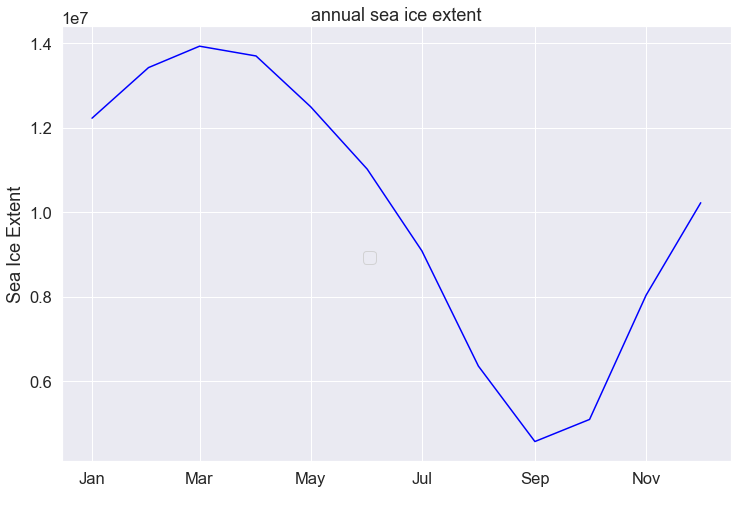

In [34]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.plot(df_years_pred['date'],
       df_years_pred.iloc[:, 1],
       color='blue')

# Set title and labels for axes
ax.set(xlabel=" ",
       ylabel="Sea Ice Extent",
       title="annual sea ice extent")

# Define the date format
date_form = DateFormatter("%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_formatter(DateFormatter('%b'))

fig.legend(loc='center')
plt.show();

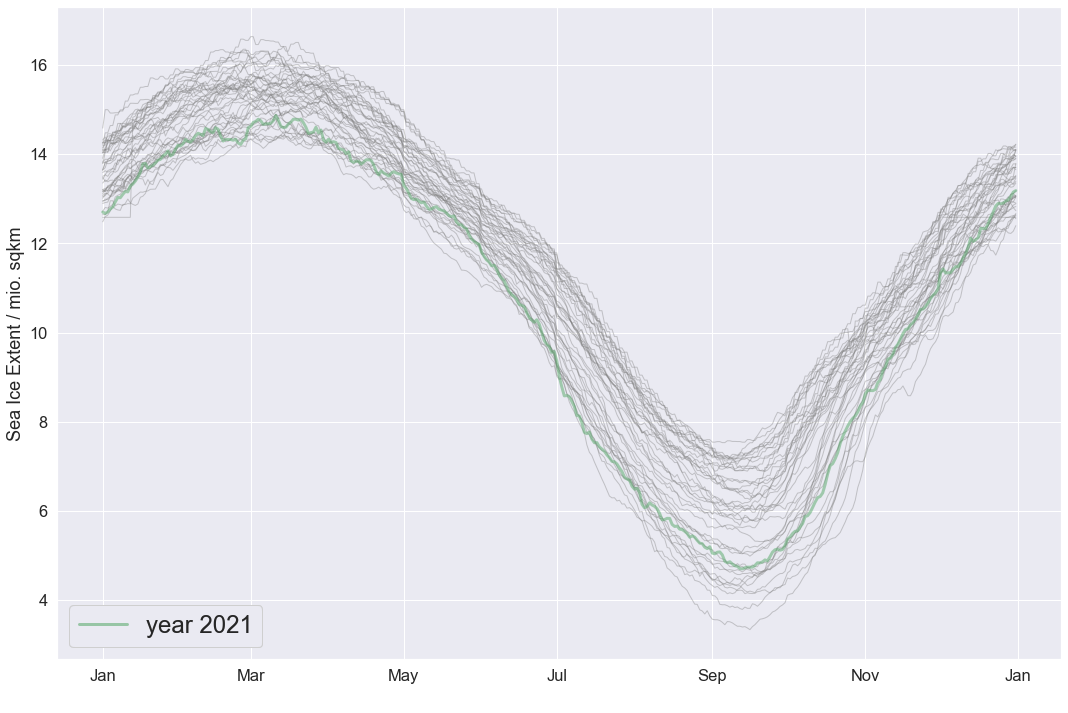

In [35]:
fig, ax = plt.subplots(figsize=(18,12))
camera = Camera(fig)


for i in range(43):
    for k in range(i):
        ax.plot(df['date'], df.iloc[:, k], marker='', color='grey', linewidth=1, alpha=0.4)

    t = ax.plot(df['date'], df.iloc[:, i], linewidth=3, alpha=0.5)
    ax.legend(t, [f'year {i+1979}'], loc='lower left', prop={'size': 24})
    # Set title and labels for axes
    ax.set(xlabel=" ",
            ylabel="Sea Ice Extent / mio. sqkm",
            title="")
    #fig.suptitle('Annual trend of Sea Ice Extent', fontsize = 24)

    # Define the date format
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    camera.snap()

#Applying the animate method to create animations
animation = camera.animate(interval=500)
 
#Saving the animation
animation.save('../images/my_animation2.gif')
# to store it as mp4
#animation.save('../images/my_animation2.mp4')

In [36]:
Video('../images/my_animation2.mp4',width=1024)

In [ ]:
## animation also with predicted values (not with nice date)

fig = plt.figure(figsize=(18,12))
camera = Camera(fig)

for i in range(44):
    for k in range(i):
        plt.plot(df['date'], df.iloc[:, k], marker='', color='grey', linewidth=1, alpha=0.4)

    t = plt.plot(df['date'], df.iloc[:, i], linewidth=3, alpha=0.5)
    plt.legend(t, [f'year {i+1978}'])
    camera.snap()

for i in range(60):
    for j in range(44):
        plt.plot(df['date'], df.iloc[:, j], marker='', color='grey', linewidth=1, alpha=0.4)
    for k in range(i):
        plt.plot(df_years_pred['date'], df_years_pred.iloc[:, k], marker='', color='lightblue', linewidth=1, alpha=0.4)

    t = plt.plot(df_years_pred['date'], df_years_pred.iloc[:, i], linewidth=3, alpha=0.5)
    plt.legend(t, [f'year {i+2022}'])
    camera.snap()

#Applying the animate method to create animations
animation = camera.animate(interval=300)
 
#Saving the animation
animation.save('../images/my_animation3.mp4')